# Gelman Schools 

##### Keywords: normal-normal model, hierarchical normal-normal model, hierarchical, divergences, non-centered hierarchical model, sampling distribution

$$
\mu \sim \mathcal{N}(0, 5)\\
\tau \sim \text{Half-Cauchy}(0, 5)\\
\nu_{j} \sim \mathcal{N}(0, 1)\\
\theta_{j} = \mu + \tau\nu_j \\
\bar{y_{j}} \sim \mathcal{N}(\theta_{j}, \sigma_{j})
$$




In [57]:
using Turing
using ArviZ
ArviZ.use_style(["default", "arviz-darkgrid"])

@model school8_mv(J, y, sigma) = begin
    mu ~ Normal(0, 5)
    tau ~ Truncated(Cauchy(0, 5), 0, Inf)
    #eta = tzeros(J)
    eta ~ MvNormal(fill(0.0,J), fill(1.0,J))
    theta =mu .+ tau .* eta
    for j = 1:J
            dist = Normal(theta[j], sigma[j])
            y[j] ~ dist
    end
    return (mu=mu, tau=tau, eta=eta, theta=theta)

end




school8_mv (generic function with 4 methods)

In [58]:

J = 8;
y = [28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0];
sigma = [15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0];


model_fun_mv = school8_mv(J, y, sigma);
#model_fun() # correctly draws a NamedTuple


chns_mv = sample(model_fun_mv, NUTS(2000,0.8), 4000) # lacks theta, y_hat, and log_lik

┌ Info: Found initial step size
│   ϵ = 1.6
└ @ Turing.Inference /home/bolic/.julia/packages/Turing/uMQmD/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (4000×22×1 Array{Float64, 3}):

Iterations        = 2001:1:6000
Number of chains  = 1
Samples per chain = 4000
Wall duration     = 1.83 seconds
Compute duration  = 1.83 seconds
parameters        = eta[5], eta[3], mu, eta[2], eta[1], eta[6], tau, eta[7], eta[8], eta[4]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

          mu    4.4388    3.2893     0.0520    0.0501   3863.3340    0.9999    ⋯
         tau    3.5743    3.2484     0.0514    0.0536   2749.5135    0.9999    ⋯
      eta[1]    0.3155    0.9852     0.0156    0.0154   4114.6649    0.9998    ⋯
      eta[2]    0.0927    0.9546     0.0151    0.0156   3771.1704    1.0001    ⋯
  

Your GR installation is incomplete. Rerunning build step for GR package.


┌ Error: Error importing GR_jll:
│   err = InitError(:Glib_jll, ErrorException("could not load library \"/home/bolic/.julia/artifacts/b069ad81d556658ea64a543367e128e535fab269/lib/libgio-2.0.so\"\n/home/bolic/.julia/artifacts/b069ad81d556658ea64a543367e128e535fab269/lib/libgobject-2.0.so.0: undefined symbol: g_uri_ref"))
└ @ GR /home/bolic/.julia/packages/GR/bVi3d/src/funcptrs.jl:42
┌ Info: Switching provider to GR due to error in depsfile
│   depsfile = /home/bolic/.julia/packages/GR/bVi3d/deps/deps.jl
└ @ GR /home/bolic/.julia/packages/GR/bVi3d/src/GR.jl:351
┌ Info: Emptying depsfile. GR provider is GR
│   provider = GR
│   depsfile = /home/bolic/.julia/packages/GR/bVi3d/deps/deps.jl
└ @ GR.Builder /home/bolic/.julia/packages/GR/bVi3d/deps/build.jl:128
┌ Info: Downloading pre-compiled GR 0.58.1 Ubuntu binary
└ @ GR.Builder /home/bolic/.julia/packages/GR/bVi3d/deps/build.jl:193


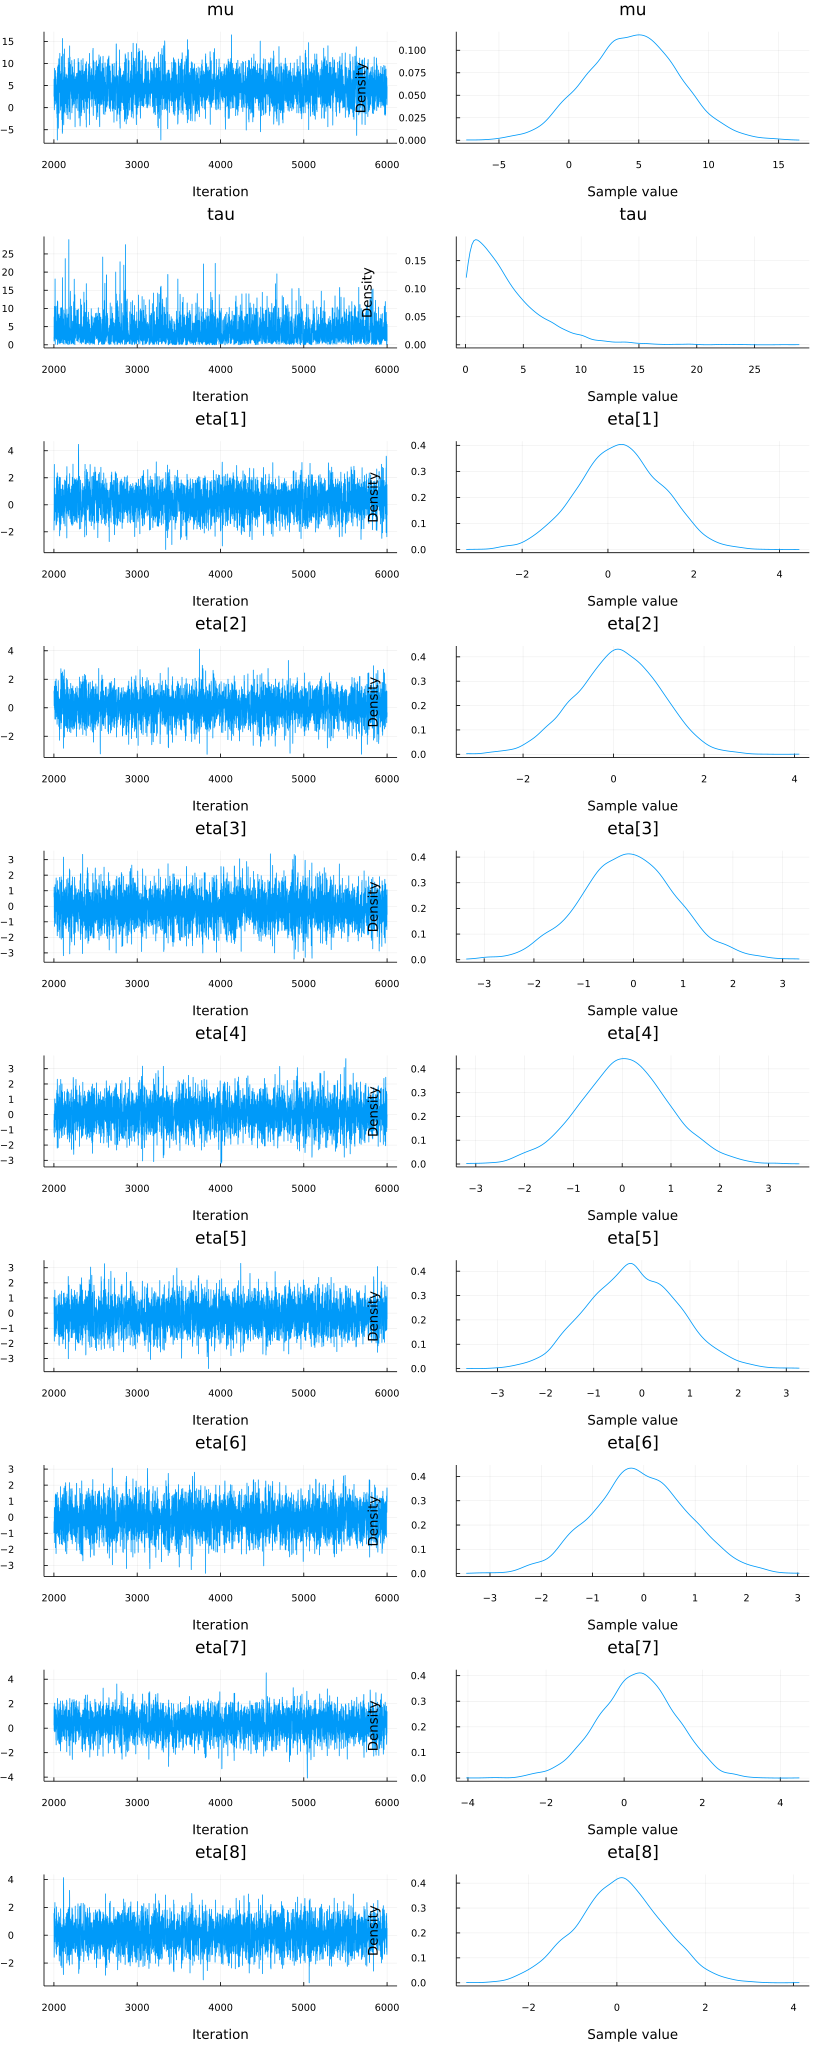

┌ Info: GR was successfully rebuilt
└ @ GR /home/bolic/.julia/packages/GR/bVi3d/src/GR.jl:360


In [4]:
using StatsPlots
plot(chns_mv)

In [59]:
mu_post_mv = Array(chns_mv[:mu])
tau_post_mv = Array(chns_mv[:tau])
eta_post_mv = (get(chns_mv,:eta))

(eta = ([-0.3869937024087696; 0.6584277755340197; … ; 0.39547826498831645; 0.7745127195969337], [1.9901091942570883; -1.4866071914673087; … ; -2.0317664853841575; 1.0840724948905534], [0.3491248255186574; -0.5718848666512244; … ; 0.22753245175656583; -0.6378137436402305], [0.46253307251146103; 0.5126334641662709; … ; -0.39069304751641726; 0.5636862777681897], [-1.4191024088220434; -0.6622300281528999; … ; -0.9606526566745359; 1.1714414757270935], [0.8686161054634131; -1.243436475435899; … ; 1.9864136541602326; -1.4668343566210287], [0.8200450313466869; 0.0899939445447083; … ; 0.10125007061393293; -0.3540285819862463], [-0.5892174068022011; 1.9161026640458603; … ; -0.5956272248999805; 1.423843870141574]),)

In [60]:
 a = Vector{Real}(undef, 8)
for j = 1:8
    a[j]=mean(mu_post_mv)+mean(tau_post_mv)*mean(eta_post_mv.eta[j])
end
a

8-element Vector{Real}:
 5.56654678109643
 4.770296742446394
 4.048126949570627
 4.630714330233627
 3.86196513371027
 4.245152196686896
 5.594128164675999
 4.722224607682328